# Check the error of central differencing and upwind differencing, for 1D constant advection equation

In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
'''
Define the experimental parameters
'''
# Define the domain
a = 0
b = 1


# Define the mesh grid
N = 1000
x_grid = np.linspace(a, b, N+1)
dx = x_grid[1] - x_grid[0]

# Define the advection speed
c = 1

# Define the time step
dt = 1 * dx

# Define the total time
T = 0.5

In [24]:
print("dt is ", dt)

dt is  0.001


In [25]:
'''
Initial condition
'''

def initial_condition(x):
    u_initial = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= 0.4 and x[i] >= 0.2:
            u_initial[i] = 1
        else:
            u_initial[i] = 0
    return u_initial

In [26]:
# Define the u evolution and the time evolution
u_total = [initial_condition(x_grid)]
t_total = np.linspace(0, T, int(T/dt)+1)

# Experiments

In [27]:
'''
Central difference experiments
'''
for t in t_total:
    u_previous = u_total[-1]
    u_new = np.zeros(len(x_grid))

    # Update the interior points using central difference
    u_derivative = -(u_previous[:-2] + u_previous[2:]) / (2 * dx)
    u_new[1:-1] = u_previous[1:-1] - c * dt * u_derivative

    # Update the boundary points using Neumann boundary condition
    u_new[0] = u_new[1]
    u_new[-1] = u_new[-2]

    u_total.append(u_new)


Plotted time is 0.01


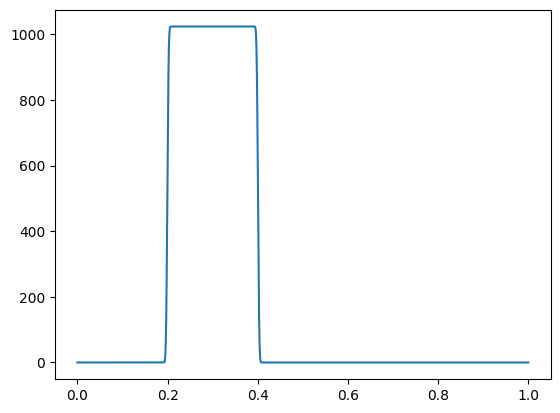

In [29]:
# plt.plot(x_grid, u_total[0])

idx_testing = 10
plt.plot(x_grid, u_total[idx_testing])
print("Plotted time is " + str(t_total[idx_testing]))